In [90]:
#Load libraries
import os
import pandas as pd
import numpy as np
from fancyimpute import KNN   
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform

In [91]:
#Set working directory
os.chdir("E:\projectpy")

In [92]:
#Load data
churn = pd.read_csv("train_data.csv")
churn_test=pd.read_csv("test_data.csv")

In [93]:
#combine two datasets
df=churn.append(churn_test,ignore_index=True)

In [94]:
df['area code']=df['area code'].astype(object)

In [95]:
#Assigning levels to the categories
lis = []
for i in range(0, df.shape[1]):
    if(df.iloc[:,i].dtypes == 'object'):
        df.iloc[:,i] = pd.Categorical(df.iloc[:,i])
        df.iloc[:,i] = df.iloc[:,i].cat.codes 
        df.iloc[:,i] = df.iloc[:,i].astype('object')
        lis.append(df.columns[i])
        

In [96]:
#to find any missing values
missing_val = pd.DataFrame(df.isnull().sum())

In [97]:
lis1=[]
for i in range(0, df.shape[1]):
    if(df.iloc[:,i].dtypes != 'object'):
        lis1.append(df.columns[i])

In [98]:
lis1

['account length',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'number customer service calls']

In [99]:
#Detect and replace with NA
for i in lis1:
    
    # #Extract quartiles
    q75, q25 = np.percentile(df.loc[:,i], [75,25])

    # #Calculate IQR
    iqr = q75 - q25

    # #Calculate inner and outer fence
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)

    # #Replace with NA
    df.loc[df.loc[:,i] < minimum,i] = np.nan
    df.loc[df.loc[:,i] > maximum,i] = np.nan



In [112]:
# #Calculate missing value
missing_val = pd.DataFrame(df.isnull().sum())

In [113]:
missing_val.loc[:,0].sum()

0

In [111]:
# #Impute with KNN
df = pd.DataFrame(KNN(k = 3).complete(df), columns = df.columns)

Imputing row 1/5000 with 0 missing, elapsed time: 10.768
Imputing row 101/5000 with 1 missing, elapsed time: 11.491
Imputing row 201/5000 with 0 missing, elapsed time: 11.501
Imputing row 301/5000 with 0 missing, elapsed time: 11.509
Imputing row 401/5000 with 0 missing, elapsed time: 11.996
Imputing row 501/5000 with 0 missing, elapsed time: 12.009
Imputing row 601/5000 with 0 missing, elapsed time: 12.023
Imputing row 701/5000 with 0 missing, elapsed time: 12.031
Imputing row 801/5000 with 0 missing, elapsed time: 12.037
Imputing row 901/5000 with 0 missing, elapsed time: 12.048
Imputing row 1001/5000 with 0 missing, elapsed time: 12.060
Imputing row 1101/5000 with 0 missing, elapsed time: 12.067
Imputing row 1201/5000 with 1 missing, elapsed time: 12.072
Imputing row 1301/5000 with 0 missing, elapsed time: 12.076
Imputing row 1401/5000 with 2 missing, elapsed time: 12.080
Imputing row 1501/5000 with 0 missing, elapsed time: 12.084
Imputing row 1601/5000 with 0 missing, elapsed time:

In [114]:
##Correlation analysis
#Correlation plot
df_corr = df.loc[:,lis1]

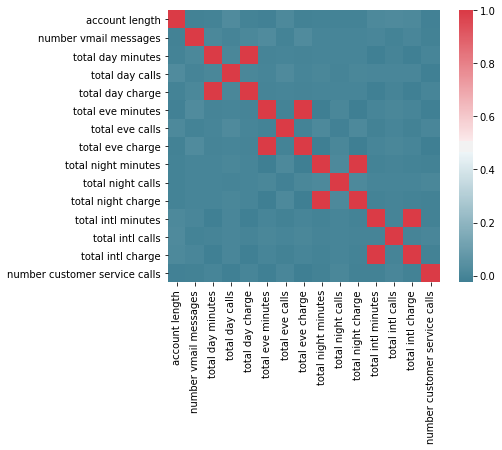

In [115]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [119]:
#Chisquare test of independence
#Save categorical variables
cat_names = lis[0:5]
cat_names

['state', 'area code', 'phone number', 'international plan', 'voice mail plan']

In [120]:
#loop for chi square values
for i in cat_names:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(df['Churn'], df[i]))
    print(p)

state
7.850836224371827e-05
area code
0.7546581385329686
phone number
0.493350889587423
international plan
1.9443947474998577e-74
voice mail plan
7.164501780988496e-15


In [125]:
#dimension reduction
df = df.drop(['area code', 'phone number', 'total day charge', 'total eve charge', 'total intl charge','total night charge'], axis=1)

In [127]:
df2 = df.copy()

(array([1.028e+03, 1.000e+00, 8.000e+00, 1.100e+01, 6.000e+00, 2.800e+01,
        2.500e+01, 9.000e+00, 1.831e+03, 2.100e+01, 1.900e+01, 5.200e+01,
        2.800e+01, 1.700e+01, 4.000e+01, 1.400e+01, 1.200e+01, 1.155e+03,
        3.000e+00, 1.000e+01, 1.000e+01, 2.000e+00, 0.000e+00, 4.000e+00,
        0.000e+00, 6.660e+02]),
 array([0.        , 0.11538462, 0.23076924, 0.34615386, 0.46153847,
        0.57692309, 0.69230771, 0.80769233, 0.92307695, 1.03846157,
        1.15384618, 1.2692308 , 1.38461542, 1.50000004, 1.61538466,
        1.73076928, 1.84615389, 1.96153851, 2.07692313, 2.19230775,
        2.30769237, 2.42307699, 2.5384616 , 2.65384622, 2.76923084,
        2.88461546, 3.00000008]),
 <a list of 26 Patch objects>)

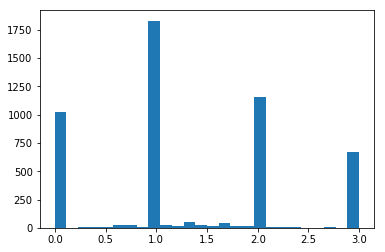

In [131]:
#Normality check
%matplotlib inline  
plt.hist(df['number customer service calls'], bins='auto')

In [132]:
#Nomalisation
cnames=["number customer service calls","number vmail messages"]
for i in cnames:
    print(i)
    df[i] = (df[i] - min(df[i]))/(max(df[i]) - min(df[i]))

number customer service calls
number vmail messages


In [133]:
# #Standarisation
cnames1=['account length',
 'total day minutes',
 'total day calls',
 'total eve minutes',
 'total eve calls',
 'total night minutes',
 'total night calls',
 'total intl minutes',
 'total intl calls']
for i in cnames1:
    print(i)
    df[i] = (df[i] - df[i].mean())/df[i].std()

account length
total day minutes
total day calls
total eve minutes
total eve calls
total night minutes
total night calls
total intl minutes
total intl calls


In [ ]:
#replace target categories with Yes or No
df['Churn'] = df['Churn'].replace(0.0, 'No')
df['Churn'] = df['Churn'].replace(1.0, 'Yes')

In [160]:
train=df.iloc[0:3333,:]

In [161]:
test=df.iloc[3333:,:]

In [162]:
X_train=train.iloc[:,0:14]
y_train=train.iloc[:,14]
X_test=test.iloc[:,0:14]
y_test=test.iloc[:,14]

In [163]:
y_train.head()

0    No
1    No
2    No
3    No
4    No
Name: Churn, dtype: object

In [ ]:
###### MODEL DEVELOPMENT #############

In [148]:
#Import Libraries for decision tree
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split

In [164]:
#Decision Tree
C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

#predict new test cases
C50_Predictions = C50_model.predict(X_test)

#Create dot file to visualise tree  #http://webgraphviz.com/
# dotfile = open("pt.dot", 'w')
# df = tree.export_graphviz(C50_model, out_file=dotfile, feature_names = marketing_train.columns)

In [167]:
#build confusion matrix
# from sklearn.metrics import confusion_matrix 
# CM = confusion_matrix(y_test, y_pred)
CM = pd.crosstab(y_test, C50_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)

#False Negative rate 
#(FN*100)/(FN+TP)

#Results
#Accuracy: 89.5
#FNR: 40

89.50209958008398

In [168]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators = 500).fit(X_train, y_train)

In [169]:
RF_Predictions = RF_model.predict(X_test)

In [172]:
#build confusion matrix
# from sklearn.metrics import confusion_matrix 
# CM = confusion_matrix(y_test, y_pred)
CM = pd.crosstab(y_test, RF_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
#((TP+TN)*100)/(TP+TN+FP+FN)

#False Negative rate 
(FN*100)/(FN+TP)

#Accuracy: 92.6
#FNR: 53.6

53.57142857142857

In [173]:
#KNN implementation
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors = 9).fit(X_train, y_train)

In [174]:
#predict test cases
KNN_Predictions = KNN_model.predict(X_test)

In [176]:
#build confusion matrix
CM = pd.crosstab(y_test, KNN_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)

#False Negative rate 
(FN*100)/(FN+TP)

#Accuracy: 86.8
#FNR: 96.8

96.875

In [177]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Naive Bayes implementation
NB_model = GaussianNB().fit(X_train, y_train)

In [178]:
#predict test cases
NB_Predictions = NB_model.predict(X_test)

In [180]:
#Build confusion matrix
CM = pd.crosstab(y_test, NB_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)

#False Negative rate 
#(FN*100)/(FN+TP)

#Accuracy: 85.8
#FNR: 68.3

85.84283143371326

In [182]:
#logistic regression
df['Churn'] = df['Churn'].replace('No', 0)
df['Churn'] = df['Churn'].replace('Yes', 1)

In [210]:
#Create logistic data. Save target variable first
df_logit = pd.DataFrame(df['Churn'])

In [211]:
coln=['account length','number vmail messages',
 'total day minutes',
 'total day calls',
 'total eve minutes',
 'total eve calls',
 'total night minutes',
 'total night calls',
 'total intl minutes',
 'total intl calls',
 'number customer service calls']
colc=['state','international plan',
 'voice mail plan',]

In [212]:
#Add continous variables
df_logit = df_logit.join(df[coln])

In [219]:
df_logit.head()

,Churn,account length,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,...,state_45.0,state_46.0,state_47.0,state_48.0,state_49.0,state_50.0,international plan_0.0,international plan_1.0,voice mail plan_0.0,voice mail plan_1.0
0,0,0.729252,0.595238,1.620364,0.511713,-0.066175,-0.064155,0.909643,-0.461182,-0.117382,...,0,0,0,0,0,0,1,0,0,1
1,0,0.188240,0.619048,-0.357302,1.189526,-0.105234,0.142886,1.108831,0.164757,1.331274,...,0,0,0,0,0,0,1,0,0,1
2,0,0.961115,0.000000,1.205723,0.720271,-1.632643,0.505208,-0.776273,0.216918,0.743981,...,0,0,0,0,0,0,1,0,1,0
3,0,-0.404297,0.000000,2.275764,-1.521729,-1.525249,-0.633519,-0.071926,-0.565505,-1.448580,...,0,0,0,0,0,0,0,1,1,0
4,0,-0.636160,0.000000,-0.259852,0.668131,-1.075540,1.126331,-0.277275,1.103665,-0.078229,...,0,0,0,0,0,0,0,1,1,0


In [214]:
##Create dummies for categorical variables
cat_names = ["state", "international plan", "voice mail plan"]

for i in colc:
    temp = pd.get_dummies(df[i], prefix = i)
    df_logit = df_logit.join(temp)

In [218]:
train_l=df_logit.iloc[0:3333,:]
test_l=df_logit.iloc[3333:,:]

In [220]:
#select column indexes for independent variables
train_cols = train_l.columns[1:67]

In [223]:
#Built Logistic Regression
import statsmodels.api as sm

logit = sm.Logit(train_l['Churn'], train_l[train_cols]).fit()

logit.summary()

Optimization terminated successfully.
         Current function value: 0.342990
         Iterations 7


C:\Users\sonne\Anaconda3\lib\site-packages\statsmodels\base\model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\sonne\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\sonne\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\sonne\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3269
Method:                           MLE   Df Model:                           63
Date:                Sat, 21 Jul 2018   Pseudo R-squ.:                  0.1711
Time:                        10:59:58   Log-Likelihood:                -1143.2
converged:                       True   LL-Null:                       -1379.1
                                        LLR p-value:                 6.122e-64
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
account length                    0.0428      0.054      0.791      0.429      -0.063       0.149
number vmail messages             0.8532      0.709      1.203      0.229      -0.537       2.243
total day minutes                 0.5516      0.056      9.931      0.000       0.443       0.660
total day calls                   0.0771      0.054      1.431      0.152      -0.028       0.183
total eve minutes                 0.2774      0.055      5.013      0.000       0.169       0.386
total eve calls                   0.0177      0.055      0.321      0.748      -0.090       0.126
total night minutes               0.1778      0.055      3.242      0.001       0.070       0.285
total night calls                 0.0055      0.055      0.100      0.920      -0.102       0.113
total intl minutes                0.1464      0.055      2.668      0.008       0.039       0.254
total intl calls                 -0.2381      0.057     -4.207      0.000      -0.349      -0.127
number customer service calls    -0.0152      0.171     -0.089      0.929      -0.351       0.320
state_0.0                        -0.8108        nan        nan        nan         nan         nan
state_1.0                        -0.4332        nan        nan        nan         nan         nan
state_2.0                         0.4227        nan        nan        nan         nan         nan
state_3.0                        -0.6881        nan        nan        nan         nan         nan
state_4.0                         0.8563        nan        nan        nan         nan         nan
state_5.0                         0.1021        nan        nan        nan         nan         nan
state_6.0                         0.1098        nan        nan        nan         nan         nan
state_7.0                        -0.3461        nan        nan        nan         nan         nan
state_8.0                        -0.0708        nan        nan        nan         nan         nan
state_9.0                        -0.2262        nan        nan        nan         nan         nan
state_10.0                        0.1329        nan        nan        nan         nan         nan
state_11.0                       -0.9411        nan        nan        nan         nan         nan
state_12.0                       -0.4391        nan        nan        nan         nan         nan
state_13.0                        0.1223        nan        nan        nan         nan         nan
state_14.0                       -1.1558        nan        nan        nan         nan         nan
state_15.0                       -0.1405        nan        nan        nan         nan         nan
state_16.0                        0.1597        nan        nan        nan         nan         nan
state_17.0                        0.0519        nan        nan        nan         nan         nan
state_18.0                       -0.2737        nan        nan        nan         nan         nan
state_1

In [224]:
#Predict test data
test_l['Actual_prob'] = logit.predict(test_l[train_cols])

test_l['ActualVal'] = 1
test_l.loc[test_l.Actual_prob < 0.5, 'ActualVal'] = 0

C:\Users\sonne\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sonne\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\sonne\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata

In [227]:
#Build confusion matrix
CM = pd.crosstab(test_l['Churn'], test_l['ActualVal'])

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)

(FN*100)/(FN+TP)

81.69642857142857

In [ ]:
#accuracy=87%
#FNR=81%